In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
sc.settings.set_figure_params(dpi=100)

In [2]:
# read in the levenshtein distance for the epitope information
df_l = pd.read_csv('../outputs/model_v3/full.epitope.levenshtein.csv', index_col=0)

[Text(0.5, 0, 'Levenshtein Distance'), Text(0, 0.5, 'Count')]

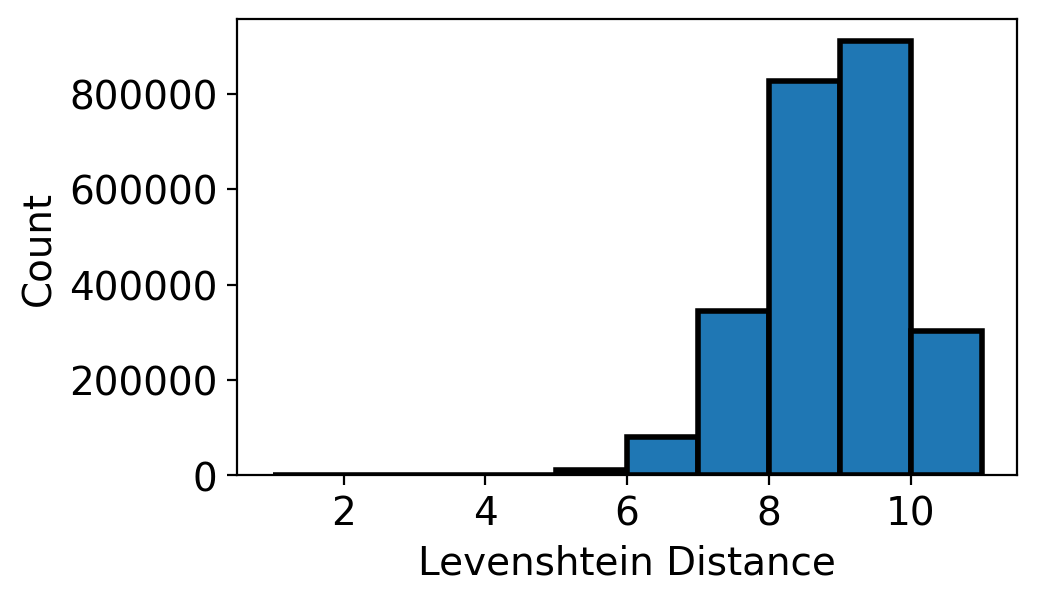

In [3]:
# check the levenshtein distance
fig, ax = plt.subplots(figsize=[5, 3])
ax.grid(False)
ax.hist(df_l.values.flatten()[df_l.values.flatten() > 0], linewidth=2, edgecolor='k', width=1)
ax.set(xlabel='Levenshtein Distance', ylabel='Count')

In [4]:
# read in the values
cdr3_to_X = pd.read_csv('../outputs/model_v3/cdr3.conversion.n30.csv', index_col=0)
ag_to_X = pd.read_csv('../outputs/model_v3/epitope.conversion.n15.csv', index_col=0)

In [2]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_curve, auc, accuracy_score
from tqdm import tqdm

%load_ext tensorboard

2024-01-03 14:32:35.554398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-03 14:32:35.709995: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-03 14:32:36.330469: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-03 14:32:36.330574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

100%|███████████████████████████████████████| 1576/1576 [01:03<00:00, 24.78it/s]


127014 58678


2023-12-29 09:56:25.085664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-12-29 09:56:25.085710: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-12-29 09:56:25.086306: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
2977/2977 [==============================] - 15s 5ms/step - loss: 0.5161 - accuracy: 0.7337 - auc: 0.7910 - val_loss: 0.4766 - val_accuracy: 0.7558 - val_auc: 0.8337
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4360 - accuracy: 0.7816 - auc: 0.8648 - val_loss: 0.4034 - val_accuracy: 0.7999 - val_auc: 0.8877
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3265 - accuracy: 0.8480 - auc: 0.9301 - val_loss: 0.3060 - val_accuracy: 0.8620 - val_auc: 0.9385
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.2313 - accuracy: 0.8978 - auc: 0.9659 - val_loss: 0.2599 - val_accuracy: 0.8877 - val_auc: 0.9565
Epoch 5/10
2977/2977 [==============================] - 10s 3ms/step - loss: 0.1745 - accuracy: 0.9256 - auc: 0.9807 - val_loss: 0.2442 - val_accuracy: 0.8978 - val_auc: 0.9651
Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.1335 - accuracy: 0.9447 - auc: 0.988

Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.1401 - accuracy: 0.9411 - auc: 0.9877 - val_loss: 0.2270 - val_accuracy: 0.9078 - val_auc: 0.9691
Epoch 7/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.1098 - accuracy: 0.9555 - auc: 0.9925 - val_loss: 0.2328 - val_accuracy: 0.9099 - val_auc: 0.9713
Epoch 8/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.0875 - accuracy: 0.9659 - auc: 0.9952 - val_loss: 0.2290 - val_accuracy: 0.9185 - val_auc: 0.9750
Epoch 9/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.0711 - accuracy: 0.9732 - auc: 0.9967 - val_loss: 0.2207 - val_accuracy: 0.9265 - val_auc: 0.9745
Epoch 10/10
3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 15s 5ms/step - loss: 0.5166 - accuracy: 0.7320 - auc: 0.7914 - val_loss: 0.4802 - val_accuracy: 0.7576 - val_auc: 0.8350
Epoch 2/10
2977/2977 [========================

3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 15s 5ms/step - loss: 0.5160 - accuracy: 0.7338 - auc: 0.7925 - val_loss: 0.4888 - val_accuracy: 0.7422 - val_auc: 0.8283
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4361 - accuracy: 0.7802 - auc: 0.8647 - val_loss: 0.3985 - val_accuracy: 0.8059 - val_auc: 0.8922
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3229 - accuracy: 0.8495 - auc: 0.9314 - val_loss: 0.3270 - val_accuracy: 0.8484 - val_auc: 0.9331
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.2290 - accuracy: 0.8993 - auc: 0.9666 - val_loss: 0.2596 - val_accuracy: 0.8860 - val_auc: 0.9567
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.1697 - accuracy: 0.9274 - auc: 0.9819 - val_loss: 0.2390 - val_accuracy: 0.8990 - val_auc: 0.9642
Epoch 6/10
2977/2977 [==============================] - 11

100%|███████████████████████████████████████| 1576/1576 [01:10<00:00, 22.27it/s]


127014 114741
Epoch 1/10
2977/2977 [==============================] - 14s 4ms/step - loss: 0.5942 - accuracy: 0.6403 - auc: 0.7176 - val_loss: 0.5615 - val_accuracy: 0.6693 - val_auc: 0.7586
Epoch 2/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.5382 - accuracy: 0.6905 - auc: 0.7819 - val_loss: 0.5307 - val_accuracy: 0.6994 - val_auc: 0.7949
Epoch 3/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.4923 - accuracy: 0.7319 - auc: 0.8272 - val_loss: 0.4973 - val_accuracy: 0.7307 - val_auc: 0.8277
Epoch 4/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.4333 - accuracy: 0.7769 - auc: 0.8733 - val_loss: 0.4653 - val_accuracy: 0.7572 - val_auc: 0.8546
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3697 - accuracy: 0.8201 - auc: 0.9120 - val_loss: 0.4446 - val_accuracy: 0.7783 - val_auc: 0.8732
Epoch 6/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.3133 - accuracy: 0.854

Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3192 - accuracy: 0.8519 - auc: 0.9365 - val_loss: 0.4436 - val_accuracy: 0.7928 - val_auc: 0.8823
Epoch 7/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.2727 - accuracy: 0.8788 - auc: 0.9546 - val_loss: 0.4391 - val_accuracy: 0.8011 - val_auc: 0.8901
Epoch 8/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.2360 - accuracy: 0.8979 - auc: 0.9663 - val_loss: 0.4720 - val_accuracy: 0.8052 - val_auc: 0.8951
Epoch 9/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.2056 - accuracy: 0.9124 - auc: 0.9745 - val_loss: 0.4693 - val_accuracy: 0.8155 - val_auc: 0.8990
Epoch 10/10
3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.5966 - accuracy: 0.6364 - auc: 0.7128 - val_loss: 0.5666 - val_accuracy: 0.6634 - val_auc: 0.7578
Epoch 2/10
2977/2977 [========================

3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.5929 - accuracy: 0.6400 - auc: 0.7178 - val_loss: 0.5583 - val_accuracy: 0.6736 - val_auc: 0.7619
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5364 - accuracy: 0.6947 - auc: 0.7853 - val_loss: 0.5265 - val_accuracy: 0.7032 - val_auc: 0.7984
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4932 - accuracy: 0.7308 - auc: 0.8274 - val_loss: 0.5016 - val_accuracy: 0.7244 - val_auc: 0.8222
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4415 - accuracy: 0.7724 - auc: 0.8683 - val_loss: 0.4831 - val_accuracy: 0.7399 - val_auc: 0.8420
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3827 - accuracy: 0.8109 - auc: 0.9048 - val_loss: 0.4711 - val_accuracy: 0.7651 - val_auc: 0.8629
Epoch 6/10
2977/2977 [==============================] - 11

100%|███████████████████████████████████████| 1576/1576 [01:17<00:00, 20.21it/s]


127014 127014
Epoch 1/10
2977/2977 [==============================] - 14s 4ms/step - loss: 0.6161 - accuracy: 0.6196 - auc: 0.6869 - val_loss: 0.5809 - val_accuracy: 0.6611 - val_auc: 0.7383
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5604 - accuracy: 0.6747 - auc: 0.7604 - val_loss: 0.5543 - val_accuracy: 0.6808 - val_auc: 0.7700
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5213 - accuracy: 0.7104 - auc: 0.8021 - val_loss: 0.5325 - val_accuracy: 0.7012 - val_auc: 0.7925
Epoch 4/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.4770 - accuracy: 0.7440 - auc: 0.8405 - val_loss: 0.5160 - val_accuracy: 0.7168 - val_auc: 0.8108
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4353 - accuracy: 0.7727 - auc: 0.8705 - val_loss: 0.5131 - val_accuracy: 0.7256 - val_auc: 0.8202
Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3960 - accuracy: 0.799

Epoch 6/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.3995 - accuracy: 0.7962 - auc: 0.8924 - val_loss: 0.5192 - val_accuracy: 0.7303 - val_auc: 0.8249
Epoch 7/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.3657 - accuracy: 0.8186 - auc: 0.9118 - val_loss: 0.5360 - val_accuracy: 0.7261 - val_auc: 0.8228
Epoch 8/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.3315 - accuracy: 0.8390 - auc: 0.9291 - val_loss: 0.5440 - val_accuracy: 0.7383 - val_auc: 0.8334
Epoch 9/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.3024 - accuracy: 0.8585 - auc: 0.9419 - val_loss: 0.5666 - val_accuracy: 0.7395 - val_auc: 0.8326
Epoch 10/10
3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6164 - accuracy: 0.6163 - auc: 0.6837 - val_loss: 0.5835 - val_accuracy: 0.6490 - val_auc: 0.7286
Epoch 2/10
2977/2977 [========================

3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6168 - accuracy: 0.6185 - auc: 0.6854 - val_loss: 0.5847 - val_accuracy: 0.6502 - val_auc: 0.7309
Epoch 2/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.5633 - accuracy: 0.6731 - auc: 0.7555 - val_loss: 0.5558 - val_accuracy: 0.6793 - val_auc: 0.7628
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5245 - accuracy: 0.7077 - auc: 0.7978 - val_loss: 0.5357 - val_accuracy: 0.6960 - val_auc: 0.7860
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4837 - accuracy: 0.7373 - auc: 0.8336 - val_loss: 0.5157 - val_accuracy: 0.7114 - val_auc: 0.8064
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4438 - accuracy: 0.7663 - auc: 0.8638 - val_loss: 0.5161 - val_accuracy: 0.7187 - val_auc: 0.8149
Epoch 6/10
2977/2977 [==============================] - 11

100%|███████████████████████████████████████| 1576/1576 [01:26<00:00, 18.30it/s]


127014 127014
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6167 - accuracy: 0.6131 - auc: 0.6738 - val_loss: 0.5860 - val_accuracy: 0.6417 - val_auc: 0.7110
Epoch 2/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.5649 - accuracy: 0.6688 - auc: 0.7499 - val_loss: 0.5644 - val_accuracy: 0.6767 - val_auc: 0.7583
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5260 - accuracy: 0.7066 - auc: 0.7964 - val_loss: 0.5419 - val_accuracy: 0.6941 - val_auc: 0.7854
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4909 - accuracy: 0.7367 - auc: 0.8283 - val_loss: 0.5305 - val_accuracy: 0.7051 - val_auc: 0.7959
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4553 - accuracy: 0.7618 - auc: 0.8563 - val_loss: 0.5272 - val_accuracy: 0.7096 - val_auc: 0.8031
Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4190 - accuracy: 0.785

Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4141 - accuracy: 0.7851 - auc: 0.8818 - val_loss: 0.5179 - val_accuracy: 0.7241 - val_auc: 0.8189
Epoch 7/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3823 - accuracy: 0.8064 - auc: 0.9012 - val_loss: 0.5278 - val_accuracy: 0.7263 - val_auc: 0.8202
Epoch 8/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3531 - accuracy: 0.8252 - auc: 0.9173 - val_loss: 0.5542 - val_accuracy: 0.7219 - val_auc: 0.8164
Epoch 9/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3267 - accuracy: 0.8420 - auc: 0.9305 - val_loss: 0.5679 - val_accuracy: 0.7252 - val_auc: 0.8223
Epoch 10/10
3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 14s 4ms/step - loss: 0.6171 - accuracy: 0.6121 - auc: 0.6717 - val_loss: 0.5862 - val_accuracy: 0.6521 - val_auc: 0.7210
Epoch 2/10
2977/2977 [========================

3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6163 - accuracy: 0.6133 - auc: 0.6743 - val_loss: 0.5814 - val_accuracy: 0.6511 - val_auc: 0.7304
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5595 - accuracy: 0.6757 - auc: 0.7576 - val_loss: 0.5514 - val_accuracy: 0.6845 - val_auc: 0.7689
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5236 - accuracy: 0.7083 - auc: 0.7973 - val_loss: 0.5347 - val_accuracy: 0.7012 - val_auc: 0.7909
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4876 - accuracy: 0.7382 - auc: 0.8298 - val_loss: 0.5287 - val_accuracy: 0.7059 - val_auc: 0.8026
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4493 - accuracy: 0.7654 - auc: 0.8594 - val_loss: 0.5131 - val_accuracy: 0.7235 - val_auc: 0.8162
Epoch 6/10
2977/2977 [==============================] - 12

100%|███████████████████████████████████████| 1576/1576 [01:26<00:00, 18.17it/s]


127014 127014
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6235 - accuracy: 0.6125 - auc: 0.6707 - val_loss: 0.5922 - val_accuracy: 0.6489 - val_auc: 0.7203
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5681 - accuracy: 0.6735 - auc: 0.7529 - val_loss: 0.5619 - val_accuracy: 0.6775 - val_auc: 0.7609
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5314 - accuracy: 0.7055 - auc: 0.7922 - val_loss: 0.5454 - val_accuracy: 0.6939 - val_auc: 0.7809
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4962 - accuracy: 0.7346 - auc: 0.8253 - val_loss: 0.5334 - val_accuracy: 0.7040 - val_auc: 0.7957
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4597 - accuracy: 0.7610 - auc: 0.8542 - val_loss: 0.5288 - val_accuracy: 0.7124 - val_auc: 0.8040
Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4228 - accuracy: 0.785

Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4306 - accuracy: 0.7790 - auc: 0.8732 - val_loss: 0.5214 - val_accuracy: 0.7236 - val_auc: 0.8131
Epoch 7/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3975 - accuracy: 0.8000 - auc: 0.8936 - val_loss: 0.5348 - val_accuracy: 0.7238 - val_auc: 0.8149
Epoch 8/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3676 - accuracy: 0.8190 - auc: 0.9104 - val_loss: 0.5429 - val_accuracy: 0.7294 - val_auc: 0.8188
Epoch 9/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3412 - accuracy: 0.8354 - auc: 0.9241 - val_loss: 0.5718 - val_accuracy: 0.7222 - val_auc: 0.8114
Epoch 10/10
3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6243 - accuracy: 0.6120 - auc: 0.6670 - val_loss: 0.5960 - val_accuracy: 0.6466 - val_auc: 0.7124
Epoch 2/10
2977/2977 [========================

3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6221 - accuracy: 0.6129 - auc: 0.6744 - val_loss: 0.5861 - val_accuracy: 0.6590 - val_auc: 0.7318
Epoch 2/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.5654 - accuracy: 0.6759 - auc: 0.7550 - val_loss: 0.5557 - val_accuracy: 0.6852 - val_auc: 0.7673
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5315 - accuracy: 0.7050 - auc: 0.7909 - val_loss: 0.5419 - val_accuracy: 0.6990 - val_auc: 0.7840
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4974 - accuracy: 0.7317 - auc: 0.8227 - val_loss: 0.5299 - val_accuracy: 0.7088 - val_auc: 0.7955
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4598 - accuracy: 0.7596 - auc: 0.8522 - val_loss: 0.5208 - val_accuracy: 0.7205 - val_auc: 0.8096
Epoch 6/10
2977/2977 [==============================] - 11

100%|███████████████████████████████████████| 1576/1576 [01:27<00:00, 18.03it/s]


127014 127014
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6235 - accuracy: 0.6111 - auc: 0.6699 - val_loss: 0.5885 - val_accuracy: 0.6529 - val_auc: 0.7296
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5642 - accuracy: 0.6744 - auc: 0.7547 - val_loss: 0.5582 - val_accuracy: 0.6803 - val_auc: 0.7641
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5295 - accuracy: 0.7058 - auc: 0.7941 - val_loss: 0.5509 - val_accuracy: 0.6893 - val_auc: 0.7824
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4959 - accuracy: 0.7334 - auc: 0.8249 - val_loss: 0.5329 - val_accuracy: 0.7073 - val_auc: 0.7955
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4605 - accuracy: 0.7601 - auc: 0.8530 - val_loss: 0.5264 - val_accuracy: 0.7158 - val_auc: 0.8067
Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4260 - accuracy: 0.783

Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4277 - accuracy: 0.7816 - auc: 0.8755 - val_loss: 0.5236 - val_accuracy: 0.7231 - val_auc: 0.8146
Epoch 7/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3941 - accuracy: 0.8037 - auc: 0.8965 - val_loss: 0.5483 - val_accuracy: 0.7152 - val_auc: 0.8142
Epoch 8/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3640 - accuracy: 0.8241 - auc: 0.9128 - val_loss: 0.5511 - val_accuracy: 0.7216 - val_auc: 0.8134
Epoch 9/10
2977/2977 [==============================] - 10s 3ms/step - loss: 0.3388 - accuracy: 0.8373 - auc: 0.9254 - val_loss: 0.5650 - val_accuracy: 0.7270 - val_auc: 0.8166
Epoch 10/10
3970/3970 [==============================] - 7s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6191 - accuracy: 0.6154 - auc: 0.6767 - val_loss: 0.5812 - val_accuracy: 0.6621 - val_auc: 0.7371
Epoch 2/10
2977/2977 [========================

3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6229 - accuracy: 0.6080 - auc: 0.6656 - val_loss: 0.5844 - val_accuracy: 0.6541 - val_auc: 0.7268
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5680 - accuracy: 0.6703 - auc: 0.7488 - val_loss: 0.5620 - val_accuracy: 0.6764 - val_auc: 0.7555
Epoch 3/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.5366 - accuracy: 0.7006 - auc: 0.7849 - val_loss: 0.5429 - val_accuracy: 0.6931 - val_auc: 0.7779
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5030 - accuracy: 0.7282 - auc: 0.8177 - val_loss: 0.5284 - val_accuracy: 0.7075 - val_auc: 0.7971
Epoch 5/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.4666 - accuracy: 0.7549 - auc: 0.8481 - val_loss: 0.5211 - val_accuracy: 0.7192 - val_auc: 0.8076
Epoch 6/10
2977/2977 [==============================] - 11

100%|███████████████████████████████████████| 1576/1576 [01:28<00:00, 17.76it/s]


127014 127014
Epoch 1/10
2977/2977 [==============================] - 14s 4ms/step - loss: 0.6195 - accuracy: 0.6168 - auc: 0.6787 - val_loss: 0.5737 - val_accuracy: 0.6685 - val_auc: 0.7467
Epoch 2/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.5581 - accuracy: 0.6818 - auc: 0.7626 - val_loss: 0.5591 - val_accuracy: 0.6684 - val_auc: 0.7674
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5258 - accuracy: 0.7094 - auc: 0.7970 - val_loss: 0.5373 - val_accuracy: 0.7004 - val_auc: 0.7872
Epoch 4/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.4890 - accuracy: 0.7396 - auc: 0.8307 - val_loss: 0.5222 - val_accuracy: 0.7135 - val_auc: 0.8043
Epoch 5/10
2977/2977 [==============================] - 12s 4ms/step - loss: 0.4503 - accuracy: 0.7681 - auc: 0.8607 - val_loss: 0.5180 - val_accuracy: 0.7223 - val_auc: 0.8129
Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4131 - accuracy: 0.791

Epoch 6/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4209 - accuracy: 0.7865 - auc: 0.8790 - val_loss: 0.5362 - val_accuracy: 0.7194 - val_auc: 0.8082
Epoch 7/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3871 - accuracy: 0.8072 - auc: 0.8993 - val_loss: 0.5502 - val_accuracy: 0.7226 - val_auc: 0.8104
Epoch 8/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3593 - accuracy: 0.8238 - auc: 0.9145 - val_loss: 0.5791 - val_accuracy: 0.7223 - val_auc: 0.8086
Epoch 9/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.3335 - accuracy: 0.8406 - auc: 0.9274 - val_loss: 0.6000 - val_accuracy: 0.7118 - val_auc: 0.8034
Epoch 10/10
3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6185 - accuracy: 0.6156 - auc: 0.6768 - val_loss: 0.5807 - val_accuracy: 0.6624 - val_auc: 0.7377
Epoch 2/10
2977/2977 [========================

3970/3970 [==============================] - 8s 2ms/step
Epoch 1/10
2977/2977 [==============================] - 13s 4ms/step - loss: 0.6199 - accuracy: 0.6151 - auc: 0.6769 - val_loss: 0.5826 - val_accuracy: 0.6507 - val_auc: 0.7288
Epoch 2/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5624 - accuracy: 0.6767 - auc: 0.7557 - val_loss: 0.5546 - val_accuracy: 0.6822 - val_auc: 0.7675
Epoch 3/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.5288 - accuracy: 0.7064 - auc: 0.7917 - val_loss: 0.5348 - val_accuracy: 0.7010 - val_auc: 0.7865
Epoch 4/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4945 - accuracy: 0.7324 - auc: 0.8238 - val_loss: 0.5235 - val_accuracy: 0.7122 - val_auc: 0.8015
Epoch 5/10
2977/2977 [==============================] - 11s 4ms/step - loss: 0.4581 - accuracy: 0.7583 - auc: 0.8528 - val_loss: 0.5169 - val_accuracy: 0.7215 - val_auc: 0.8096
Epoch 6/10
2977/2977 [==============================] - 11

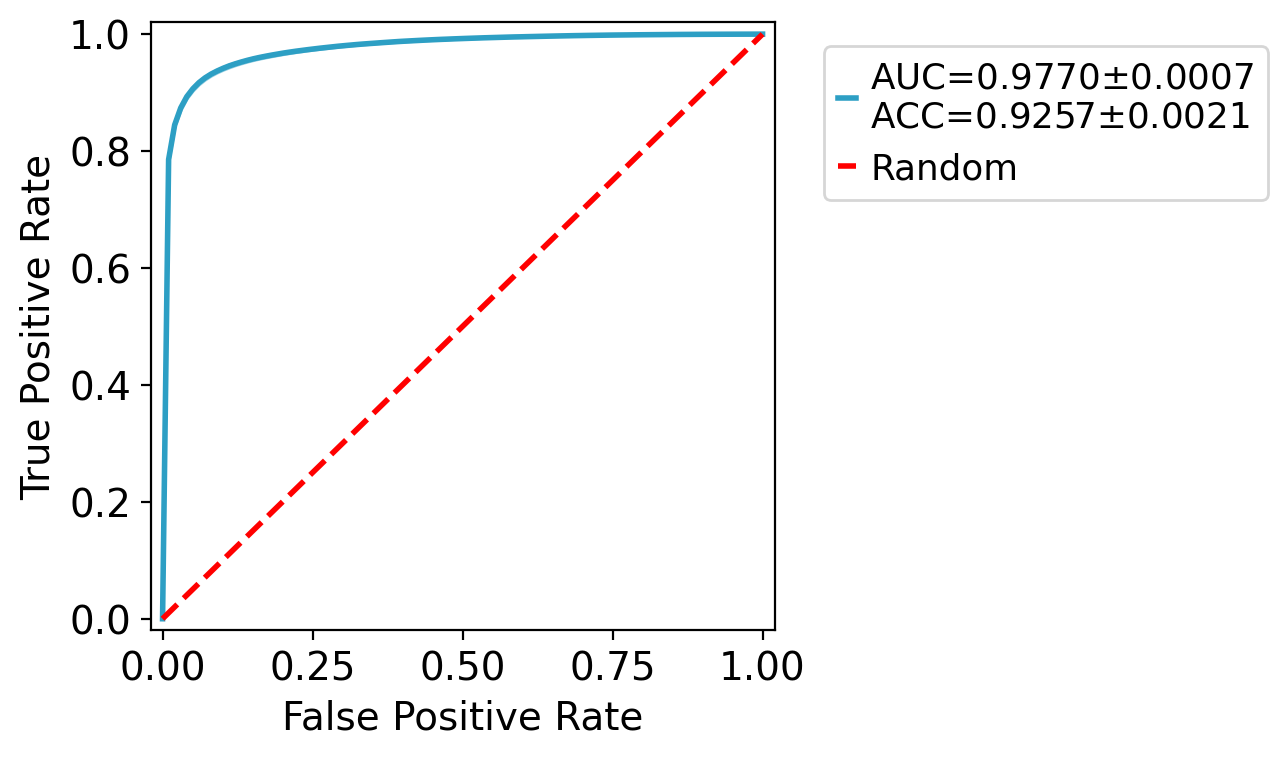

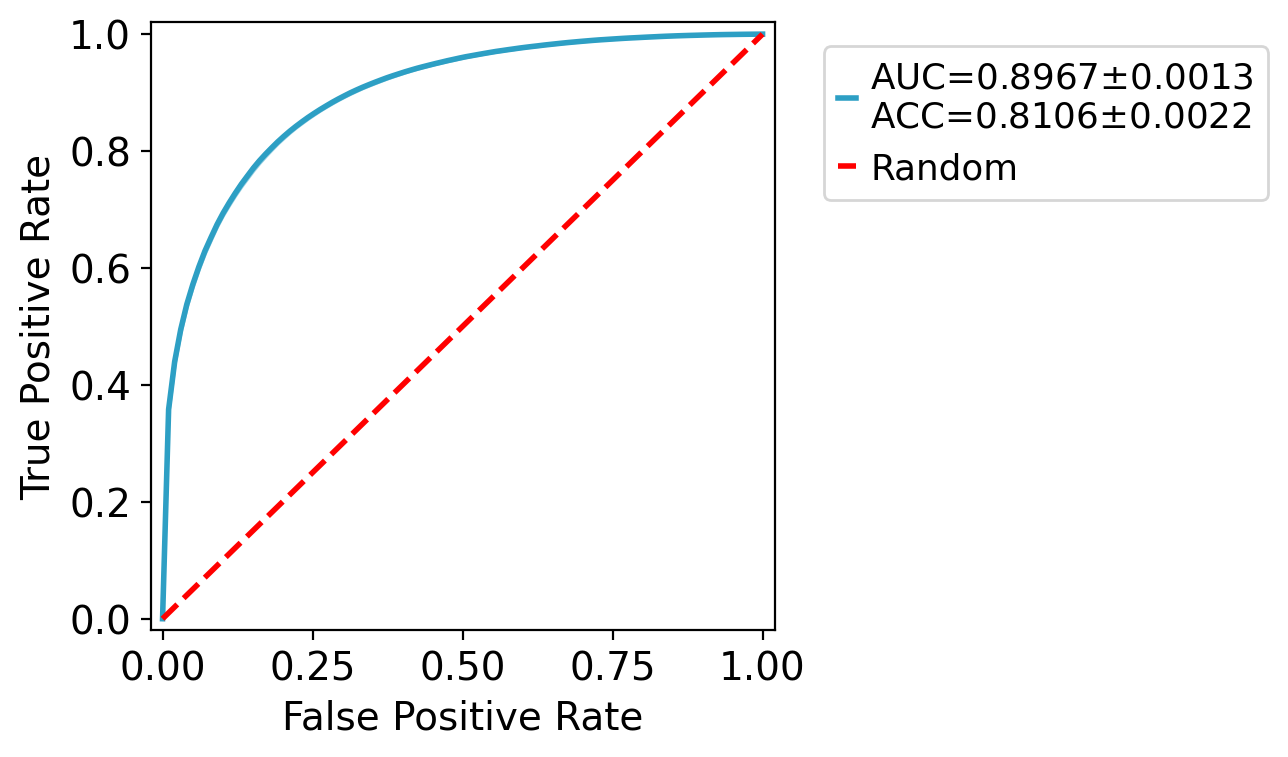

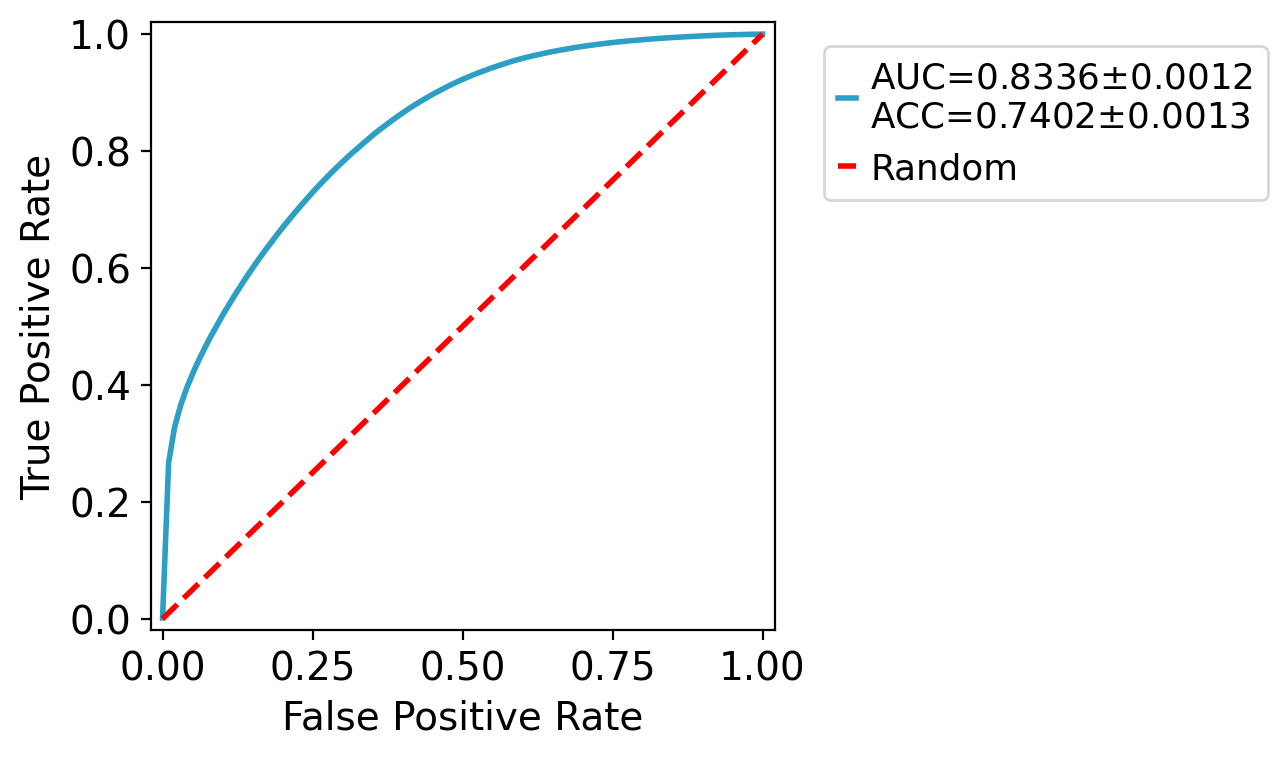

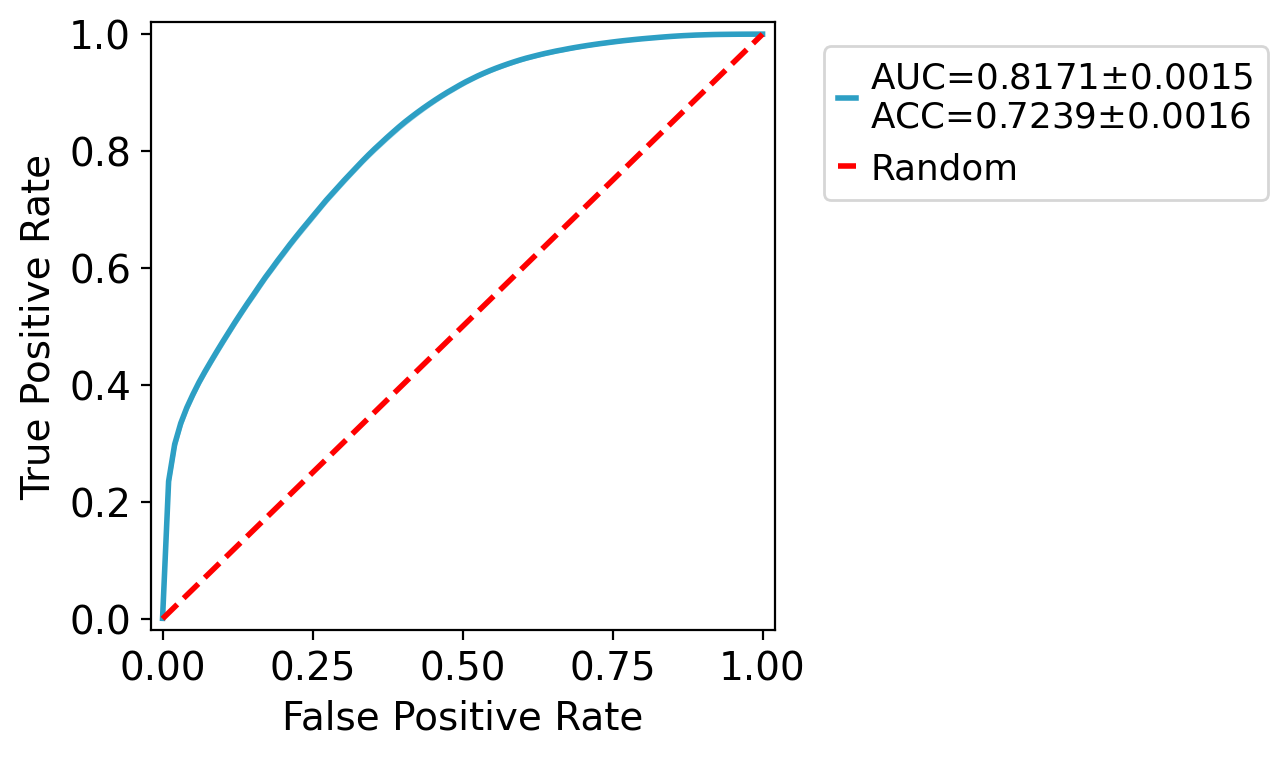

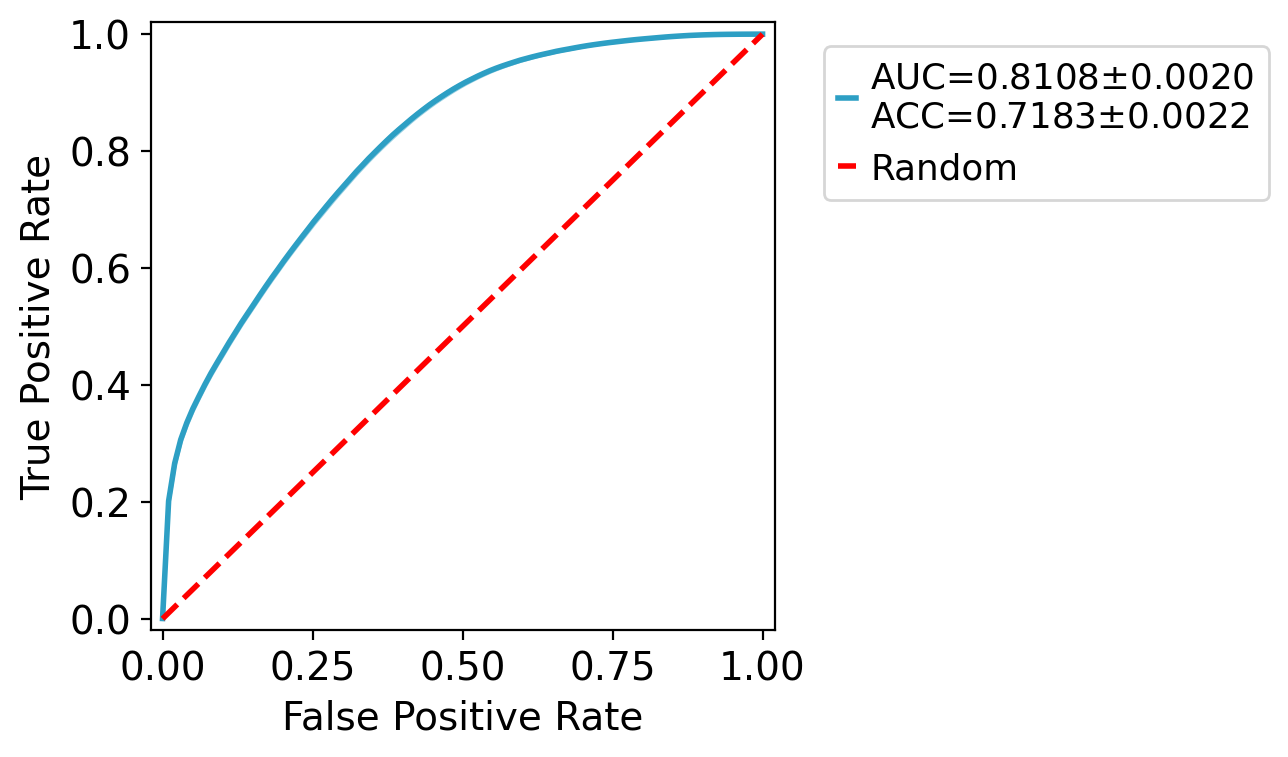

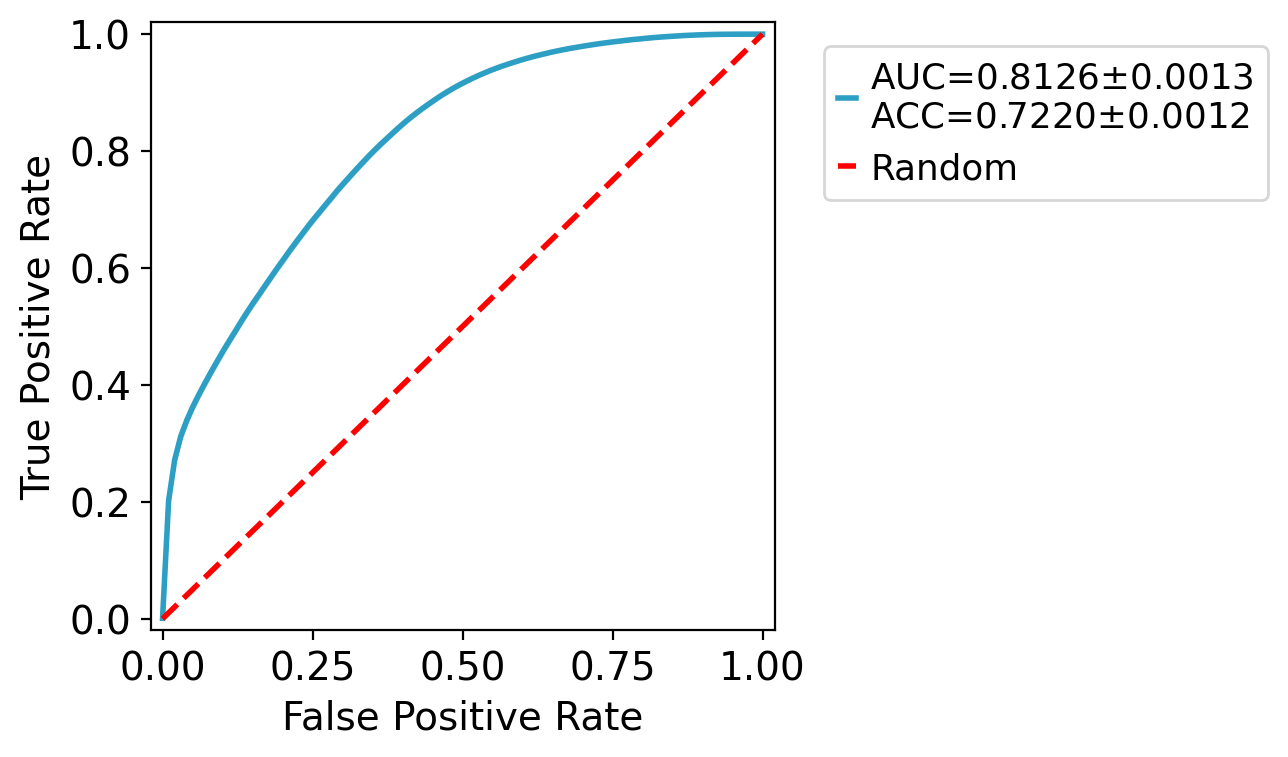

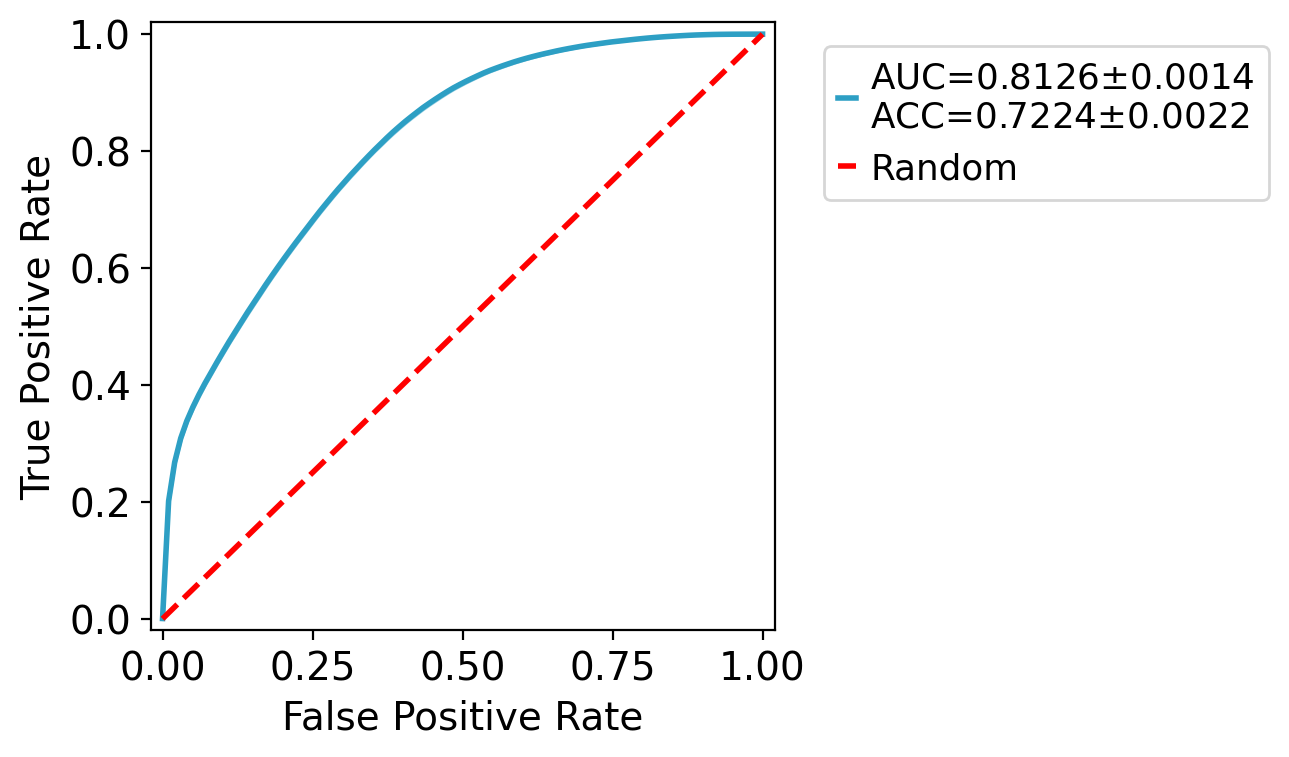

In [9]:
# check all possible levenshteins
vmax2stats = {}
for vmax in range(11, 4, -1):
    # set seed and identify irrelevant matches
    np.random.seed(0)
    irrs = []

    # read in the input peptide information
    df = pd.read_csv('../outputs/model_v3/full.input.X.csv', index_col=0)
    counts = df['Epitope'].value_counts()

    for pep in tqdm(df_l.index):
        # gather peptide cdr3 information
        n_cdr3s = counts.loc[pep]
        pep_cdr3s = df.loc[df['Epitope'] == pep, 'CDR3'].unique()
        # we first grab the peptide levenshtein distances
        pep_levenshtein = df_l[pep].sort_values()[::-1]
        # systematically identify negative controls
        irr_cdr3s = []
        # then we look at the max distance, gather those peptides, randomly choose one
        # find associated CDR3s that don't overlap with the current peptide
        irr_peps = pep_levenshtein.index[pep_levenshtein >= vmax]
        # find the irrelevant peptide CDR3s and make sure they don't overlap
        mask = (df['Epitope'].isin(irr_peps)) & (~df['CDR3'].isin(pep_cdr3s))
        if sum(mask) == 0: continue
        # if we have cdr3s then grab them out
        cdr3s = df.loc[mask, 'CDR3']
        # if there are more than we need randomly select
        if len(cdr3s) > n_cdr3s:
            irr_cdr3s = np.random.choice(cdr3s, size=n_cdr3s, replace=False).tolist()
        # otherwise add them all
        else: irr_cdr3s = cdr3s.tolist()
        # compile the full list
        irr = pd.DataFrame(irr_cdr3s, columns=['CDR3'])
        irr['Epitope'] = pep
        irrs.append(irr)

    # we'll read both of these values and the original input and irrelevant tcrs
    hit = df.copy()
    irr = pd.concat(irrs, axis=0).reset_index().iloc[:, 1:]
    print(hit.shape[0], irr.shape[0])
    # now up sample it accordingly
    if irr.shape[0] < hit.shape[0]:
        idxs = np.random.choice(irr.index, size=hit.shape[0], replace=True)
        irr = irr.loc[idxs].reset_index().iloc[:, 1:]

    # retrieve values and aucs
    fprs, tprs, aucs, accs = [], [], [], []

    # complete 10 iterations
    for seed in range(10):
        ## SETUP CONSTANTS
        # grab a subset
        np.random.seed(seed)
        n_rows = hit.shape[0] // 2
        perc_train = 0.75


        ## SEPARATE OUT TRAINING AND TESTING
        # train and test
        # > subset target
        idxs = np.random.choice(hit.index, size=n_rows, replace=False)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        hit_train, hit_test = hit.loc[idxs], hit.loc[idys]
        # > subset control
        idxs = np.random.choice(irr.index, size=n_rows, replace=False)
        idxs, idys = idxs[:round(n_rows * perc_train)], idxs[round(n_rows * perc_train):]
        irr_train, irr_test = irr.loc[idxs], irr.loc[idys]
        # confirm no overlap
        assert not hit_train.index.isin(hit_test.index).all()
        assert not irr_train.index.isin(irr_test.index).all()

        # validation
        # > subset target
        val_idxs = hit.index[~hit.index.isin(hit_train.index.union(hit_test.index))]
        hit_val = hit.loc[val_idxs]
        # > subset control
        val_idxs = irr.index[~irr.index.isin(irr_train.index.union(irr_test.index))]
        irr_val = irr.loc[val_idxs]


        ## CONVERT TO CORRECT FORMAT
        # create X for training
        X_train = pd.concat([hit_train, irr_train], axis=0).reset_index().iloc[:, 1:]
        X_train_cdr3s = cdr3_to_X.loc[X_train['CDR3']].reset_index().iloc[:, 1:]
        X_train_epitopes = ag_to_X.loc[X_train['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_train_cdr3s.columns = 'cdr3:' + X_train_cdr3s.columns
        X_train_epitopes.columns = 'ag:' + X_train_epitopes.columns
        X_train = X_train_cdr3s.join(X_train_epitopes)

        # grab y for training
        y_train = pd.concat([pd.Series(np.ones(hit_train.shape[0])),
                             pd.Series(np.zeros(irr_train.shape[0]))], axis=0).astype(int)
        y_train = y_train.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_train.shape[0] == y_train.shape[0]

        # create X for testing
        X_test = pd.concat([hit_test, irr_test], axis=0).reset_index().iloc[:, 1:]
        X_test_cdr3s = cdr3_to_X.loc[X_test['CDR3']].reset_index().iloc[:, 1:]
        X_test_epitopes = ag_to_X.loc[X_test['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_test_cdr3s.columns = 'cdr3:' + X_test_cdr3s.columns
        X_test_epitopes.columns = 'ag:' + X_test_epitopes.columns
        X_test = X_test_cdr3s.join(X_test_epitopes)

        # grab y for testing
        y_test = pd.concat([pd.Series(np.ones(hit_test.shape[0])),
                             pd.Series(np.zeros(irr_test.shape[0]))], axis=0).astype(int)
        y_test = y_test.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_test.shape[0] == y_test.shape[0]

        # create X for validation
        X_val = pd.concat([hit_val, irr_val], axis=0).reset_index().iloc[:, 1:]
        X_val_cdr3s = cdr3_to_X.loc[X_val['CDR3']].reset_index().iloc[:, 1:]
        X_val_epitopes = ag_to_X.loc[X_val['Epitope']].reset_index().iloc[:, 1:]
        # combine
        X_val_cdr3s.columns = 'cdr3:' + X_val_cdr3s.columns
        X_val_epitopes.columns = 'ag:' + X_val_epitopes.columns
        X_val = X_val_cdr3s.join(X_val_epitopes)

        # grab y for validation
        y_val = pd.concat([pd.Series(np.ones(hit_val.shape[0])),
                             pd.Series(np.zeros(irr_val.shape[0]))], axis=0).astype(int)
        y_val = y_val.reset_index().iloc[:, 1:][0]

        # confirm the same length
        assert X_val.shape[0] == y_val.shape[0]

        # remove constant columns
        X_train = X_train.loc[:, X_train.nunique(0) > 1]
        X_train = X_train.loc[:, X_train.sum(0) > 0]
        # read in normalization factors
        means = X_train.mean(0)
        stds = (X_train - means).std(0)
        # subset for relevant columns
        X_train = X_train[means.index]
        X_test = X_test[means.index]
        X_val = X_val[means.index]
        # normalize
        X_train -= means
        X_train /= stds
        X_test -= means
        X_test /= stds
        X_val -= means
        X_val /= stds

        ## SETUP MODEL
        # retrieve the appropriate columns
        cols_cdr3 = X_val.columns[X_val.columns.str.startswith('cdr3')]
        cols_ag = X_val.columns[X_val.columns.str.startswith('ag')]

        # determine model parameters
        # > layer for cdr3 alone
        input_1 = keras.layers.Input(shape=(len(cols_cdr3)))
        output_1 = keras.layers.Dense(200, activation='sigmoid')(input_1)
        # > layer for ag alone
        input_2 = keras.layers.Input(shape=(len(cols_ag)))
        output_2 = keras.layers.Dense(100, activation='sigmoid')(input_2)
        # > combined layer
        concat_3 = keras.layers.Concatenate()([output_1, output_2])
        output_3 = keras.layers.Dense(100, activation='sigmoid')(concat_3)
        # > final logit softmax layer
        output_4 = keras.layers.Dense(1, activation='sigmoid')(output_3)
        model = keras.Model(inputs=[input_1, input_2], outputs=[output_4])
        # set up the training parameters for the model
        model.compile(
            optimizer=keras.optimizers.Adam(),
            loss='binary_crossentropy',
            metrics=['accuracy','AUC'],
        )
        # train the model
        history = model.fit([X_train[cols_cdr3], X_train[cols_ag]], y_train,
                            epochs=10,
                            validation_data=([X_test[cols_cdr3], X_test[cols_ag]], y_test),
                            workers=40, use_multiprocessing=True)

        # testing predictions
        y_pred = model.predict([X_val[cols_cdr3], X_val[cols_ag]],
                               workers=40, use_multiprocessing=True)[:, 0]
        y_pred = pd.Series(y_pred, index=y_val.index, name='Pred%')
        y_pred = pd.concat([y_pred, y_val], axis=1)

        # retrieve auc metrics
        fpr, tpr, _ = roc_curve(y_pred[0], y_pred['Pred%'])
        fprs.append(fpr.tolist())
        tprs.append(tpr.tolist())
        aucs.append(auc(fpr, tpr))
        accs.append(accuracy_score(y_pred[0], y_pred['Pred%'].apply(round)))

    # create roc auc curve
    fig, ax = plt.subplots(figsize=[4, 4])
    ax.grid(False)
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, color='#2D9FC4', linewidth=2,
            label=r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, color='#2D9FC4', alpha=0.50)
    # plot the random line
    ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
    # add on labels and adjust limits
    ax.set_xlim(-0.02, 1.02)
    ax.set_ylim(-0.02, 1.02)
    ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
    ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')
    print(np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
    
    # store it up
    vmax2stats[vmax] = fprs, tprs, aucs, accs

In [10]:
# save the data
import pickle as pkl
with open('tmp.v3.pkl', 'wb') as f:
    pkl.dump(vmax2stats, f)

In [3]:
# pick up the work
import pickle as pkl
with open('tmp.v3.pkl', 'rb') as f:
    vmax2stats = pkl.load(f)

5 0.8126352359615856 0.002250302655314955 0.7223872958886421 0.003615215495586258
6 0.8126398735031561 0.0021018945488323953 0.722007022847875 0.001883253014055392
7 0.8107531371403507 0.003305782576723489 0.7182641283638025 0.003550657349516402
8 0.8170926277305248 0.002443048665996174 0.7238981529595162 0.0025728064250278
9 0.8335716359155956 0.0019808948226627005 0.7402113152880785 0.0020337784082633615
10 0.8967234725385239 0.0021002668041402114 0.810598044310076 0.0034730614780145324
11 0.9769974527600276 0.0012000183290636409 0.925659376131765 0.003340323521157837


[Text(0.5, 0, 'False Positive Rate'), Text(0, 0.5, 'True Positive Rate')]

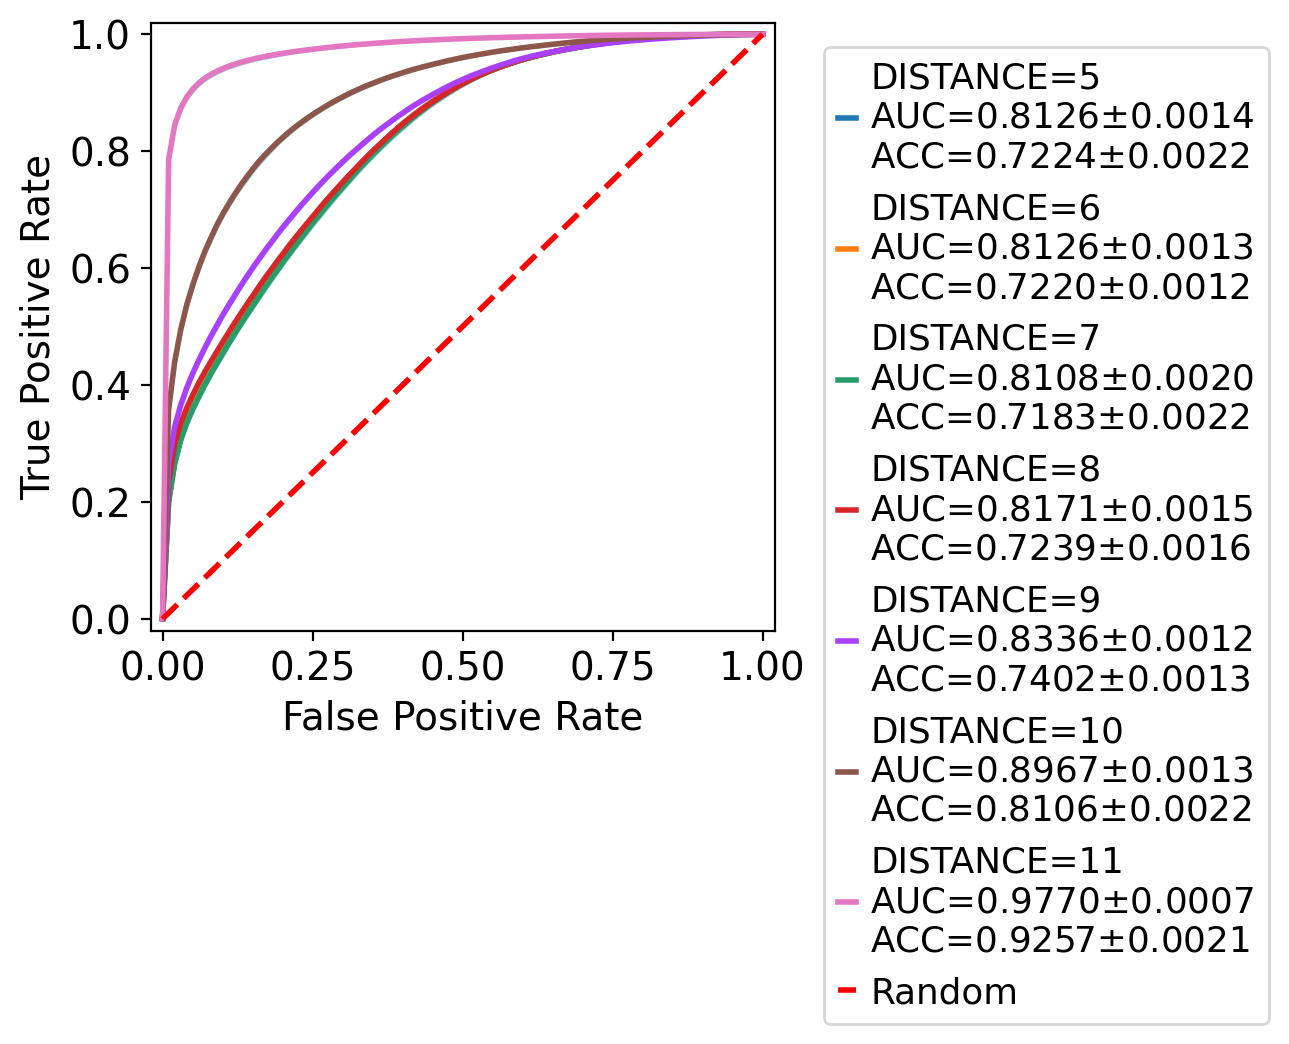

In [6]:
# create roc auc curve
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
for vmax in range(5, 12):
    # unpack the statistics
    fprs, tprs, aucs, accs = vmax2stats[vmax]
    # track values to compute mean value
    mean_tprs, mean_fpr = [], np.linspace(0, 1, 100)
    # plot the individual cv iterations
    for fpr, tpr in zip(fprs, tprs):
        # grab the true positive rate when we interpolate
        mean_tprs.append(np.interp(mean_fpr, fpr, tpr))
    #     # plot on this individual curve
    #     ax.plot(fpr, tpr, color='tab:blue', linestyle='--', linewidth=1, alpha=0.5, zorder=1)
    # grab metrics for auc
    mean_auc = np.mean(aucs)
    ci95_auc = 1.96 * np.std(aucs) / np.sqrt(len(aucs))
    # grab metrics for acc
    mean_acc = np.mean(accs)
    ci95_acc = 1.96 * np.std(accs) / np.sqrt(len(accs))
    # plot the average iteration
    mean_tpr = np.mean(mean_tprs, axis=0)
    ax.plot(mean_fpr, mean_tpr, linewidth=2,
            label=f'DISTANCE={vmax}\n' + r'AUC=%0.4f$\pm$%0.4f' % (mean_auc, ci95_auc) + '\n' +
            r'ACC=%0.4f$\pm$%0.4f' % (mean_acc, ci95_acc))
    # plot the standard errors (95% CI actually)
    ci95_tpr = 1.96 * np.std(mean_tprs, axis=0) / np.sqrt(len(mean_tprs))
    mean_tprs_upper = np.minimum(mean_tpr + ci95_tpr, 1)
    mean_tprs_lower = np.maximum(mean_tpr - ci95_tpr, 0)
    ax.fill_between(mean_fpr, mean_tprs_lower, mean_tprs_upper, color='#2D9FC4', alpha=0.50)
    print(vmax, np.mean(aucs), np.std(aucs), np.mean(accs), np.std(accs))
# plot the random line
ax.plot([0,1], [0,1], color='r', linewidth=2, linestyle='--', label='Random')
# add on labels and adjust limits
ax.set_xlim(-0.02, 1.02)
ax.set_ylim(-0.02, 1.02)
ax.legend(bbox_to_anchor=(1.05,0.99), bbox_transform=ax.transAxes)
ax.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

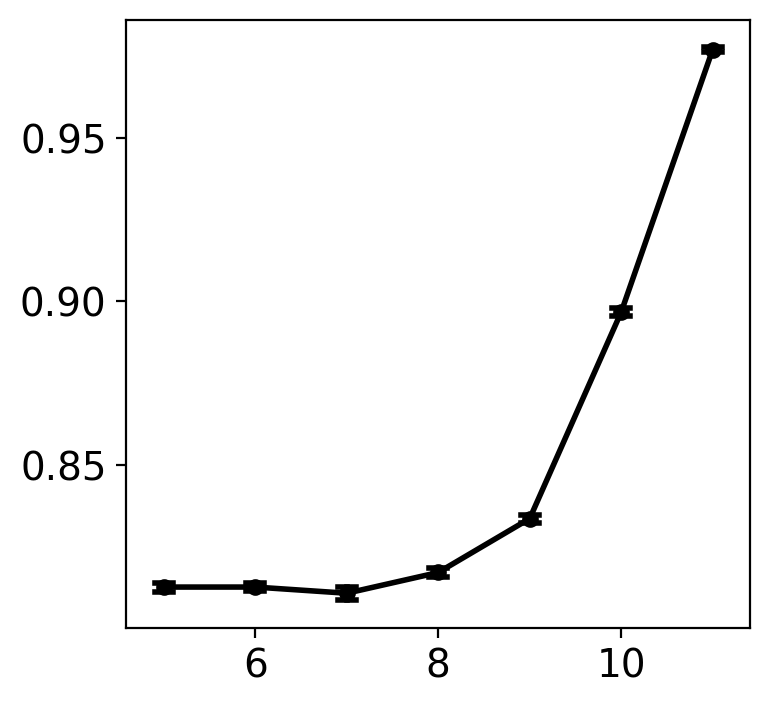

In [4]:
# get the values
xs = list(range(5, 12))
ys_mean = [np.mean(vmax2stats[x][2]) for x in xs]
ys_ci95 = [1.96 * np.std(vmax2stats[x][2]) / np.sqrt(len(vmax2stats[x][2])) for x in xs]
# create the plot
fig, ax = plt.subplots(figsize=[4, 4])
ax.grid(False)
ax.scatter(xs, ys_mean, color='k', s=2.5e1)
ax.plot(xs, ys_mean, color='k', lw=2)
# now plot the ci95s
for idx, x in enumerate(xs):
    # retrieve the data
    mean, ci95 = ys_mean[idx], ys_ci95[idx]
    # now plot the ci95
    ax.plot([x]*2, [mean-ci95, mean+ci95], color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean-ci95]*2, color='k', lw=2)
    ax.plot([x-0.1, x+0.1], [mean+ci95]*2, color='k', lw=2)